In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from scipy.sparse import dia_matrix
import pandas as pd
from qutip import *
import os
import matplotlib as mpl
from matplotlib.ticker import AutoMinorLocator
from functions import*


raw_data = np.loadtxt('mp-19426_CaWO4.xyz', dtype = str) # Tungsten atom positions in Amstrongs
elements = raw_data[:, 0]                     # strings, shape (N,)
pos = raw_data[:, 1:].astype(float)           # floats, shape (N,3)
Crystal_atoms = np.empty(len(elements), dtype=[("el", "U8"), ("xyz", float, (3,))])
Crystal_atoms["el"] = elements
Crystal_atoms["xyz"] = pos
Crystal_atoms["xyz"] -= np.array([2.667267, 2.667267, 0.000000]) # center at Er3+

theta: 1.600 deg, A_par: 0.058 kHz, A_perp: 1.050 kHz
theta: 1.600 deg, A_par: 0.058 kHz, A_perp: 1.050 kHz
theta: 1.600 deg, A_par: 0.058 kHz, A_perp: 1.050 kHz
theta: 1.600 deg, A_par: 0.058 kHz, A_perp: 1.050 kHz
theta: 1.600 deg, A_par: 0.058 kHz, A_perp: 1.050 kHz
theta: 1.600 deg, A_par: 0.058 kHz, A_perp: 1.050 kHz
theta: 1.600 deg, A_par: 0.058 kHz, A_perp: 1.050 kHz
theta: 1.600 deg, A_par: 0.058 kHz, A_perp: 1.050 kHz
theta: 1.600 deg, A_par: 0.058 kHz, A_perp: 1.050 kHz
theta: 1.600 deg, A_par: 0.058 kHz, A_perp: 1.050 kHz
theta: 1.600 deg, A_par: 0.058 kHz, A_perp: 1.050 kHz
theta: 1.600 deg, A_par: 0.058 kHz, A_perp: 1.050 kHz
theta: 1.600 deg, A_par: 0.058 kHz, A_perp: 1.050 kHz
theta: 1.600 deg, A_par: 0.058 kHz, A_perp: 1.050 kHz
theta: 1.600 deg, A_par: 0.058 kHz, A_perp: 1.050 kHz
theta: 1.600 deg, A_par: 0.058 kHz, A_perp: 1.050 kHz
theta: 1.600 deg, A_par: 0.058 kHz, A_perp: 1.050 kHz
theta: 1.600 deg, A_par: 0.058 kHz, A_perp: 1.050 kHz
theta: 1.600 deg, A_par: 0.0

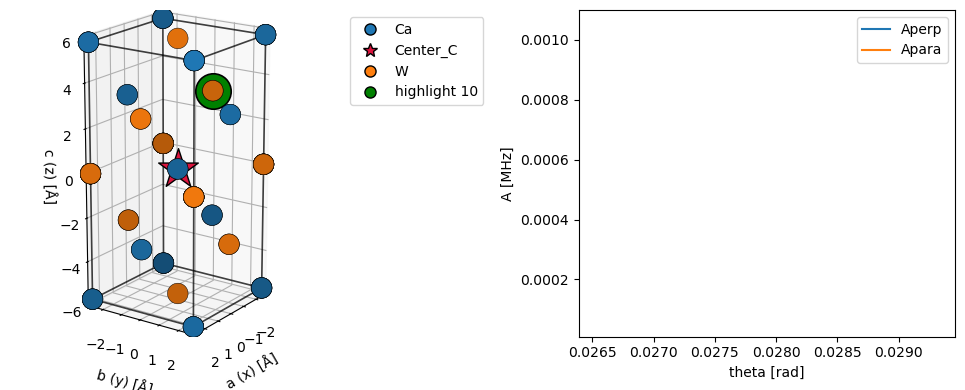

In [3]:



ay = -0.57 * np.pi / 180
ax = -0.7 * np.pi / 180

thetas =  1.6 /360*2*np.pi + np.linspace(-10 /360*2*np.pi, 10 /360*2*np.pi,1000)*0
phi_0 = 0.146 /360*2*np.pi
psi_0 = 0.368 /360*2*np.pi

b0 = 436.917
Plot_hyperFine_for_site(thetas,b0,Crystal_atoms,phi_0,psi_0,site_index=10)
